In [21]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d

In [22]:
# mpl.use("pgf")
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

zoom = 0.70
line = 0.75
np.random.seed(0)

/home/fabian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


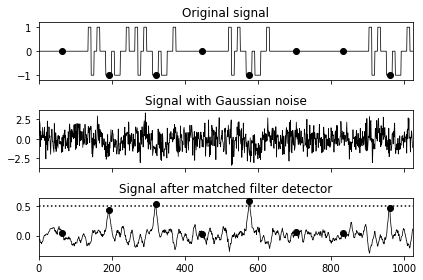

In [23]:
segments = 8
block_len = 128
x = np.linspace(0, block_len, block_len)
# block = np.sin((x/block_len)*np.pi)
# block = np.ones(block_len)
# block = signal.triang(block_len)
block = np.repeat([0., 1., -1., 0., 1., 0., 0., -1., -1., 0., -1., -1., 0., 0., 1., 0.], block_len/16)

x = np.linspace(0, block_len*segments, block_len*segments)
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], block_len)
sig = sig * np.tile(block, segments)

sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, block, mode='same') / block_len

# plt.figure()
# plt.plot(block)
# plt.show()
# plt.figure()
# plt.plot(sig)
# plt.show()
# plt.figure()
# plt.plot(sig_noise)
# plt.show()
# plt.figure()
# plt.plot(corr)
# plt.show()


clock = np.arange(64, len(sig), 128)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig, 'k-', linewidth=line, antialiased=True)
ax_orig.plot(clock, sig[clock], 'ko')
ax_orig.set_title('Original signal')

ax_noise.plot(sig_noise, 'k-', linewidth=line, antialiased=True)
ax_noise.set_title('Signal with Gaussian noise')

ax_corr.plot(corr, 'k-', linewidth=line, antialiased=True)
ax_corr.plot(clock, corr[clock], 'ko')
ax_corr.axhline(0.5, ls=':', color='black')
ax_corr.set_title('Signal after matched filter detector')

ax_orig.margins(0, 0.1)

fig.tight_layout()
fig.show()

/home/fabian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


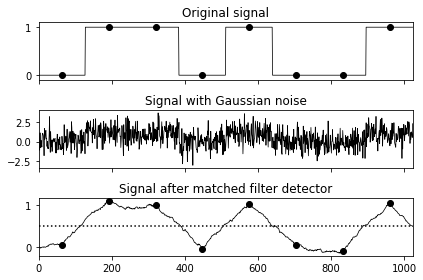

In [24]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))

corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig, 'k-', linewidth=line, antialiased=True)
ax_orig.plot(clock, sig[clock], 'ko')
ax_orig.set_title('Original signal')

ax_noise.plot(sig_noise, 'k-', linewidth=line, antialiased=True)
ax_noise.set_title('Signal with Gaussian noise')

ax_corr.plot(corr, 'k-', linewidth=line, antialiased=True)
ax_corr.plot(clock, corr[clock], 'ko')
ax_corr.axhline(0.5, ls=':', color='black')
ax_corr.set_title('Signal after matched filter detector')

ax_orig.margins(0, 0.1)

fig.tight_layout()
fig.show()

/home/fabian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


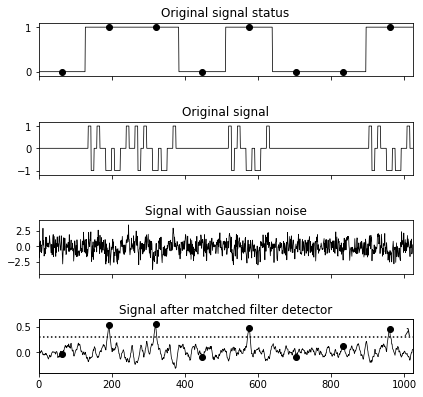

In [25]:
segments = 8
block_len = 128
x = np.linspace(0, block_len, block_len)
block = np.repeat([0., 1., -1., 0., 1., 0., 0., -1., -1., 0., -1., -1., 0., 0., 1., 0.], block_len/16)

x = np.linspace(0, block_len*segments, block_len*segments)
active = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], block_len)
sig = active * np.tile(block, segments)

status = active #*  np.tile(np.repeat([0., 0., 0., 1., 1., 0., 0., 0.], block_len/8), segments)

sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, block, mode='same') / block_len

clock = np.arange(64, len(status), 128)

fig, (ax_seq, ax_orig, ax_noise, ax_corr) = plt.subplots(4, 1, sharex=True)

ax_seq.plot(status, 'k-', linewidth=line, antialiased=True)
ax_seq.plot(clock, status[clock], 'ko')
ax_seq.set_title('Original signal status')
ax_seq.margins(0, 0.1)

ax_orig.plot(sig, 'k-', linewidth=line, antialiased=True)
ax_orig.set_title('Original signal')
ax_orig.margins(0, 0.1)

ax_noise.plot(sig_noise, 'k-', linewidth=line, antialiased=True)
ax_noise.set_title('Signal with Gaussian noise')
ax_noise.margins(0, 0.1)

ax_corr.plot(corr, 'k-', linewidth=line, antialiased=True)
ax_corr.plot(clock, corr[clock], 'ko')
ax_corr.axhline(0.3, ls=':', color='black')
ax_corr.set_title('Signal after matched filter detector')
ax_corr.margins(0, 0.1)
ax2 = ax_corr.twinx()
ax2.axes.get_yaxis().set_ticks([])
# plt.ylabel(r'$\lambda$', color='k')
# plt.text(0.6, 0.6, 'test', fontsize=20)
ax2.text(1000, 0.7, r'$\lambda$')

fig.tight_layout()
fig.show()

fig = mpl.pyplot.gcf()
w, h = fig.get_size_inches()
fig.set_size_inches(w, h*1.5)